Tugas 2 KK A - Code 2<br>
Anggota Kelompok :

- Rafid Ferdianto 05111840000032
- Muhammad Afif Fadhlurrahman 05111840000093
- Alberto Sanjaya 05111840000150

# Pre Processing

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Meter B.csv to Meter B.csv


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.datasets.samples_generator import make_blobs, make_circles, make_moons

data = pd.read_csv("Meter B.csv",delimiter="\t",header=None) 
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,1.185089,1.028128,1.016478,0.1500,2.195744,2.540944,2.511961,2.087889,2.394439,1483.869833,1486.382167,1485.372056,1484.989000,1485.153222,5260.655556,5067.588889,4977.822222,4984.077778,5170.311111,5200.205556,4111.527778,4291.850000,9.038944,4.426833,4.504556,9.241222,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.107067,84.003098,120.338783,120.144244,120.371772,120.179078,84.019053,83.919971,1
1,1.191806,1.033750,1.019411,0.2170,2.192467,2.546594,2.516744,2.075706,2.396089,1483.747389,1486.259222,1485.250333,1484.867056,1485.030722,5256.227778,5065.400000,4978.022222,4981.433333,5172.344444,5200.816667,4107.144444,4286.327778,9.030167,4.284000,4.597500,9.166444,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.114116,84.009973,120.349089,120.153889,120.381700,120.188800,84.025607,83.927260,1
2,1.181983,1.028089,1.020994,0.0889,3.246672,3.738378,3.715217,3.079356,3.523517,1483.777056,1486.288222,1485.281000,1484.898889,1485.061111,5278.550000,5002.900000,4971.044444,4958.055556,5146.377778,5179.372222,4039.272222,4302.883333,9.780722,4.612000,4.544778,10.231167,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.137487,83.983336,120.392450,120.106206,120.425422,120.140578,84.047809,83.901593,1
3,1.182761,1.028783,1.021072,0.1170,3.244489,3.741861,3.718839,3.080400,3.525933,1483.847444,1486.357167,1485.350444,1484.970167,1485.131278,5276.144444,4994.794444,4973.305556,4956.305556,5149.922222,5175.688889,4036.355556,4297.377778,9.749389,4.835333,4.749278,10.945056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.133493,83.979407,120.387033,120.100444,120.419883,120.134933,84.043715,83.897597,1
4,1.182272,1.028922,1.021350,0.0222,3.245944,3.742217,3.715456,3.080950,3.525128,1483.819056,1486.328444,1485.320500,1484.944333,1485.103278,5272.716667,4993.561111,4969.877778,4952.244444,5147.422222,5174.011111,4035.338889,4297.572222,9.602333,4.479889,4.716833,9.984056,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,52.500000,52.500000,52.900000,52.900000,50.700000,50.700000,49.800000,49.800000,84.135354,83.980807,120.389361,120.102800,120.422050,120.137472,84.045346,83.898959,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,2.418111,0.000000,0.000000,0.0000,5.332300,6.662456,6.288444,0.000000,5.922272,1550.598167,1514.837722,1516.918111,0.000000,1527.452111,126.551166,188.576672,1547.186278,2372.372333,609.580089,824.413989,0.000000,0.000000,23.878667,5.989722,6.529556,0.000000,63.750000,65.016667,75.316667,91.172222,91.250000,93.038889,93.038889,0.211111,0.355556,87.543889,87.543889,79.873333,79.873333,82.130556,82.130556,96.462778,96.462778,80.552229,80.323852,118.229294,117.738550,118.007206,117.542750,0.000000,0.000000,3
88,3.290425,0.000000,0.000000,0.0000,5.420572,6.653589,6.309761,0.000000,5.924100,1542.063444,1514.835889,1516.951389,0.000000,1527.424278,123.475461,197.298350,1605.865611,2354.717556,620.432450,843.762544,0.000000,0.000000,24.409833,6.758722,6.662389,0.000000,62.905556,62.483333,74.011111,90.622222,90.622222,92.272222,92.272222,0.183333,0.288889,87.433889,87.433889,79.853889,79.853889,82.328889,82.328889,96.534444,96.534444,80.10

In [13]:
from sklearn.preprocessing import normalize

data = data.drop(data.columns[51], axis=1)

data_scaled = normalize(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)

data = data_scaled
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50
0,0.000083,0.000072,0.000071,0.000011,0.000154,0.000178,0.000176,0.000146,0.000168,0.104070,0.104247,0.104176,0.104149,0.104161,0.368954,0.355413,0.349117,0.349556,0.362617,0.364714,0.288360,0.301007,0.000634,0.000310,0.000316,0.000648,0.007013,0.007013,0.007013,0.007013,0.007013,0.007013,0.007013,0.007013,0.007013,0.003682,0.003682,0.003710,0.003710,0.003556,0.003556,0.003493,0.003493,0.005899,0.005892,0.008440,0.008426,0.008442,0.008429,0.005893,0.005886
1,0.000084,0.000073,0.000072,0.000015,0.000154,0.000179,0.000177,0.000146,0.000168,0.104101,0.104277,0.104206,0.104179,0.104191,0.368780,0.355391,0.349261,0.349500,0.362895,0.364892,0.288160,0.300731,0.000634,0.000301,0.000323,0.000643,0.007016,0.007016,0.007016,0.007016,0.007016,0.007016,0.007016,0.007016,0.007016,0.003683,0.003683,0.003711,0.003711,0.003557,0.003557,0.003494,0.003494,0.005901,0.005894,0.008444,0.008430,0.008446,0.008433,0.005895,0.005888
2,0.000083,0.000072,0.000072,0.000006,0.000229,0.000263,0.000262,0.000217,0.000248,0.104514,0.104691,0.104620,0.104593,0.104605,0.371810,0.352394,0.350150,0.349235,0.362500,0.364824,0.284518,0.303086,0.000689,0.000325,0.000320,0.000721,0.007044,0.007044,0.007044,0.007044,0.007044,0.007044,0.007044,0.007044,0.007044,0.003698,0.003698,0.003726,0.003726,0.003571,0.003571,0.003508,0.003508,0.005926,0.005916,0.008480,0.008460,0.008483,0.008462,0.005920,0.005910
3,0.000083,0.000072,0.000072,0.000008,0.000229,0.000264,0.000262,0.000217,0.000248,0.104564,0.104741,0.104670,0.104643,0.104654,0.371800,0.351974,0.350460,0.349262,0.362905,0.364721,0.284434,0.302828,0.000687,0.000341,0.000335,0.000771,0.007047,0.007047,0.007047,0.007047,0.007047,0.007047,0.007047,0.007047,0.007047,0.003700,0.003700,0.003728,0.003728,0.003573,0.003573,0.003509,0.003509,0.005929,0.005918,0.008483,0.008463,0.008486,0.008466,0.005922,0.005912
4,0.000083,0.000073,0.000072,0.000002,0.000229,0.000264,0.000262,0.000217,0.000249,0.104607,0.104784,0.104713,0.104686,0.104697,0.371718,0.352038,0.350368,0.349125,0.362885,0.364759,0.284485,0.302972,0.000677,0.000316,0.000333,0.000704,0.007050,0.007050,0.007050,0.007050,0.007050,0.007050,0.007050,0.007050,0.007050,0.003701,0.003701,0.003729,0.003729,0.003574,0.003574,0.003511,0.003511,0.005931,0.005921,0.008487,0.008467,0.008490,0.008469,0.005925,0.005915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.000560,0.000000,0.000000,0.000000,0.001235,0.001543,0.001457,0.000000,0.001372,0.359194,0.350911,0.351392,0.000000,0.353833,0.029315,0.043684,0.358404,0.549558,0.141209,0.190975,0.000000,0.000000,0.005531,0.001388,0.001513,0.000000,0.014768,0.015061,0.017447,0.021120,0.021138,0.021552,0.021552,0.000049,0.000082,0.020279,0.020279,0.018503,0.018503,0.019025,0.019025,0.022346,0.022346,0.018660,0.018607,0.027388,0.027274,0.027336,0.027229,0.000000,0.000000
88,0.000760,0.000000,0.000000,0.000000,0.001252,0.001536,0.001457,0.000000,0.001368,0.356052,0.349765,0.350253,0.000000,0.352672,0.028510,0.045555,0.370783,0.543688,0.143254,0.194819,0.000000,0.000000,0.005636,0.001561,0.001538,0.000000,0.014524,0.014427,0.017089,0.020924,0.020924,0.021305,0.021305,0.000042,0.000067,0.020188,0.020188,0.018438,0.018438,0.019009,0.019009,0.022289,0.022289,0.018495,0.018442,0.027298,0.027185,0.027247,0.027139,0.000000,0.000000
89,0.000589,0.000000,0.000000,0.000000,0.001190,0.001510,0.001423,0.000000,0.001339,0.350879,0.342773,0.343253,0.000000,0.345635,0.029108,0.044196,0.367199,0.558515,0.150910,0.201577,0.000000,0.000000,0.005455,0.001320,0.001386,0.000000,0.014546,0.015245,0.017364,0.020571,0.020571,0.021218,0.021218,0.000015,0.000039,0.019799,0.019799,0.018047,0.018047,0.018554,0.018554,0.021870,0.021870,0.018225,0.018175,0.026752,0.

# Process Algorithm

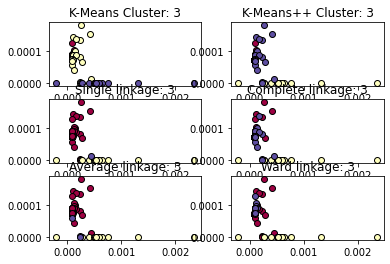

Silhouette_score k-Means : 0.6457175951690354
Silhouette_score k-Means++: 0.3337895675112394
Silhouette_score Single linkage : 0.2379202899342692
Silhouette_score Complete linkage : 0.3797365315719073
Silhouette_score Average linkage : 0.288593634586154
Silhouette_score Ward linkage : 0.34822354018057394


In [46]:
X = data.values

k = 3

# Compute Algo
kmeans = KMeans(n_clusters = k, n_init=1, init = 'random', max_iter=100).fit(X)
kmeans_plus = KMeans(n_clusters = k, n_init=1, init = 'k-means++', max_iter=100).fit(X)
agglo_complete = AgglomerativeClustering(linkage='complete',n_clusters= k).fit(X)
agglo_single = AgglomerativeClustering(linkage='single',n_clusters= k).fit(X)
agglo_avg = AgglomerativeClustering(linkage='average',n_clusters= k).fit(X)
agglo_ward = AgglomerativeClustering(linkage='ward',n_clusters= k).fit(X)

plt.subplot(3, 2, 1)
unique_labels = set(kmeans.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeans_labels = (kmeans.labels_ == k)

    xy = X[kmeans_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means Cluster: %d' % kmeans.n_clusters)

plt.subplot(3, 2, 2)

unique_labels = set(kmeans_plus.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    kmeansplus_labels = (kmeans_plus.labels_ == k)

    xy = X[kmeansplus_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('K-Means++ Cluster: %d' % kmeans_plus.n_clusters)

plt.subplot(3, 2, 3)
unique_labels = set(agglo_single.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_single_labels = (agglo_single.labels_ == k)

    xy = X[agglo_single_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Single linkage: %d' % agglo_single.n_clusters)


plt.subplot(3, 2, 4)

unique_labels = set(agglo_complete.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_complete_labels = (agglo_complete.labels_ == k)

    xy = X[agglo_complete_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Complete linkage: %d' % agglo_complete.n_clusters)


plt.subplot(3, 2, 5)
unique_labels = set(agglo_avg.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_avg_labels = (agglo_avg.labels_ == k)

    xy = X[agglo_avg_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Average linkage: %d' % agglo_avg.n_clusters)

plt.subplot(3, 2, 6)
unique_labels = set(agglo_ward.labels_)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):

    agglo_ward_labels = (agglo_ward.labels_ == k)

    xy = X[agglo_ward_labels]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Ward linkage: %d' % agglo_ward.n_clusters)

plt.show()
print("Silhouette_score k-Means :",silhouette_score(X, kmeans_labels))
print("Silhouette_score k-Means++:",silhouette_score(X, kmeansplus_labels))
print("Silhouette_score Single linkage :", silhouette_score(X, agglo_single_labels))
print("Silhouette_score Complete linkage :", silhouette_score(X, agglo_complete_labels))
print("Silhouette_score Average linkage :", silhouette_score(X, agglo_avg_labels))
print("Silhouette_score Ward linkage :", silhouette_score(X, agglo_ward_labels))